# Explore here

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

In [1]:
pip install pandas numpy matplotlib seaborn plotly.express sklearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 125.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 113.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 145.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 kB 92.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 500.6/500.6 kB 110.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 957.2/957.2 kB 129.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 157.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 150.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.4/43.4 MB 43.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 149.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 145.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━

In [24]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv', sep=";")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
df.sample(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
20788,34,technician,married,professional.course,no,no,no,cellular,aug,wed,...,2,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,yes
19974,38,technician,married,professional.course,no,yes,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,yes
35258,32,technician,single,professional.course,no,yes,no,cellular,may,fri,...,5,999,0,nonexistent,-1.8,92.893,-46.2,1.250,5099.1,no
2617,30,services,single,unknown,no,yes,no,telephone,may,tue,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
24498,29,self-employed,single,university.degree,no,yes,no,cellular,nov,mon,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
6916,34,student,single,basic.4y,unknown,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no
24645,38,admin.,single,basic.9y,no,yes,yes,cellular,nov,mon,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
8876,42,housemaid,divorced,basic.4y,unknown,yes,no,telephone,jun,thu,...,2,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,no
1458,45,blue-collar,single,basic.9y,no,no,no,telephone,may,thu,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
10053,35,technician,married,professional.course,no,yes,no,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.958,5228.1,no


In [7]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [10]:
df.describe(include="O")

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [11]:
df.duplicated().any()

True

In [12]:
df = df[df.duplicated() == False]
len(df)

41176

In [17]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [14]:
df['job'] = pd.Categorical(df['job'])
df['marital'] = pd.Categorical(df['marital'])
df['housing'] = pd.Categorical(df['housing'])

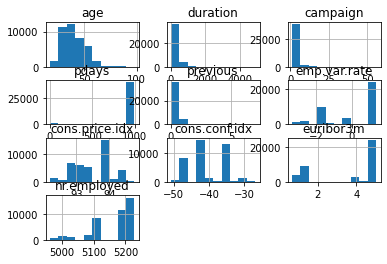

In [16]:
df.hist()
plt.show()

In [18]:
df_copy = df.copy()
df_copy['age'] = pd.cut(x=df_copy['age'], bins=[10,20,30,40,50,60,70,80,90,100])


In [19]:
df_copy = df_copy.replace({'no': 0, 'yes': 1})
df_copy

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,"(50, 60]",housemaid,married,basic.4y,0,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,"(50, 60]",services,married,high.school,unknown,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,"(30, 40]",services,married,high.school,0,1,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,"(30, 40]",admin.,married,basic.6y,0,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,"(50, 60]",services,married,high.school,0,0,1,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,"(70, 80]",retired,married,professional.course,0,1,0,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,"(40, 50]",blue-collar,married,professional.course,0,0,0,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,"(50, 60]",retired,married,university.degree,0,1,0,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,"(40, 50]",technician,married,professional.course,0,0,0,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [20]:
df_copy = pd.get_dummies(df_copy, columns = ['job', 'marital', 'default','housing', 'loan', 'contact', 'poutcome'])
df_copy.head()

,age,education,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,...,housing_unknown,housing_1,loan_0,loan_1,loan_unknown,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success
0,"(50, 60]",basic.4y,may,mon,261,1,999,0,1.1,93.994,...,0,0,1,0,0,0,1,0,1,0
1,"(50, 60]",high.school,may,mon,149,1,999,0,1.1,93.994,...,0,0,1,0,0,0,1,0,1,0
2,"(30, 40]",high.school,may,mon,226,1,999,0,1.1,93.994,...,0,1,1,0,0,0,1,0,1,0
3,"(30, 40]",basic.6y,may,mon,151,1,999,0,1.1,93.994,...,0,0,1,0,0,0,1,0,1,0
4,"(50, 60]",high.school,may,mon,307,1,999,0,1.1,93.994,...,0,0,0,1,0,0,1,0,1,0


In [21]:
month_dict={'may':5,'jul':7,'aug':8,'jun':6,'nov':11,'apr':4,'oct':10,'sep':9,'mar':3,'dec':12}
df_copy['month']= df_copy['month'].map(month_dict) 

day_dict={'thu':5,'mon':2,'wed':4,'tue':3,'fri':6}
df_copy['day_of_week']= df_copy['day_of_week'].map(day_dict) 

In [25]:
encoder = LabelEncoder()

df_copy['age'] = encoder.fit_transform(df_copy['age'])
df_copy['education'] = encoder.fit_transform(df_copy['education'])

In [26]:
# separo X, y para predicción
X=df_copy.drop('y', axis=1)
y=df_copy['y']

In [27]:
X_dummies = pd.get_dummies(X, drop_first= True)


In [28]:
scaler = StandardScaler()
scaler.fit(X_dummies)
X_dummies = scaler.transform(X_dummies)
X_dummies

array([[ 1.44946708, -1.7537527 , -0.78772266, ..., -0.33934563,
         0.39777305, -0.18572799],
       [ 1.44946708, -0.34959564, -0.78772266, ..., -0.33934563,
         0.39777305, -0.18572799],
       [-0.42086577, -0.34959564, -0.78772266, ..., -0.33934563,
         0.39777305, -0.18572799],
       ...,
       [ 1.44946708,  1.05456142,  2.15202975, ..., -0.33934563,
         0.39777305, -0.18572799],
       [ 0.51430065,  0.58650907,  2.15202975, ..., -0.33934563,
         0.39777305, -0.18572799],
       [ 3.31979994,  0.58650907,  2.15202975, ...,  2.94684805,
        -2.51399638, -0.18572799]])

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X_dummies,y,random_state=40, test_size= 0.25)

In [31]:
model = LogisticRegression(random_state=1234)
model.fit(X_train, y_train)

LogisticRegression(random_state=1234)

In [32]:
y_pred = model.predict(X_test)

In [33]:
accuracy_score(y_test, y_pred)

0.9117932776374588

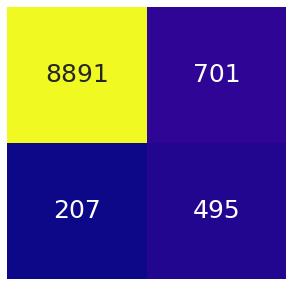

In [34]:
cm = confusion_matrix(y_pred, y_test)
cm_df = pd.DataFrame(cm)
plt.figure(figsize = (5,5))
sns.heatmap(cm_df, 
           annot=True, annot_kws={"size": 25},
           fmt="d",
           xticklabels=False, 
           yticklabels=False,
           cmap="plasma", 
           cbar=False)
plt.show()

In [35]:
# define models and parameters

model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search

grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_dummies, y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.910368 using {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
0.910069 (0.003429) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.910069 (0.003429) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.910069 (0.003429) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.910061 (0.003423) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.910069 (0.003428) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.910061 (0.003423) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.910150 (0.003429) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.910142 (0.003421) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.910134 (0.003415) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.910271 (0.003504) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.910279 (0.003512) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.910312 (0.003440) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.910036 (0.003511) wi

In [41]:
model2 = LogisticRegression(C= 0.1, penalty= 'l2', solver= 'lbfgs', random_state=132, class_weight={0:0.35, 1:0.65})
model2.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight={0: 0.35, 1: 0.65}, random_state=132)

In [42]:
y_pred = model2.predict(X_test)
accuracy_score(y_test, y_pred)

0.9120847095395376

In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      9098
           1       0.63      0.57      0.60      1196

    accuracy                           0.91     10294
   macro avg       0.79      0.77      0.78     10294
weighted avg       0.91      0.91      0.91     10294

